In [1]:
#Simple Linear Regression using Lease Square Method

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
def plot(x,y,y_hat,typ) :
    plt.figure(figsize=(30,12), dpi = 300)

    plt.scatter(x,y)

    plt.xlabel('Engine Size', fontsize = 20)
    plt.xticks(fontsize = 20)

    plt.ylabel('Horsepower', fontsize = 20) 
    plt.yticks(fontsize = 20)

    plt.plot(x,y_hat,'r')
    plt.title(typ, fontsize = 20)

In [4]:
def linearRegression(x,y,n,x_mean,y_mean) :
    nume = 0 #numerator
    deno = 0 #denominator

    # linear regression
   
    '''
    for i in range(len(x)) :
        nume = nume + (x[i] - x_mean) * (y[i] - y_mean)
        deno = deno + (x[i] - x_mean) ** 2
    '''

    a = (sum((x - x_mean)*(y - y_mean)))/sum((x - x_mean)**2)
    b = y_mean - (a*x_mean)

    y_hat = a*x + b

    print('Linear Regression')
    print('a =',a)
    print('b =',b)

    # r squared 

    rsquared(y,y_hat,y_mean)   

    typ = 'Linear Regression'

    plot(x,y,y_hat,typ)

In [23]:
def gradientDescent(x,y,n,y_mean) :
    a = 0
    b = 0

    lr = 0.01 # learning rate

    for i in range(50000):
        for j in range(len(x)):
            a_temp = a - ((lr * (1/n)) * (((a * x[j]) + b) - y[j])) * x[j]
            b_temp = b - ((lr * (1/n)) * (((a * x[j]) + b) - y[j])) 
            
            a = a_temp
            b = b_temp
            
    print('Gradient Descent')
    print('a =',a)
    print('b =',b)

    y_hat = a*x + b

    # r squared 

    rsquared(y,y_hat,y_mean)

    typ = 'Gradient Descent'

    plot(x,y,y_hat,typ)

In [24]:
def rsquared(y,y_hat,y_mean) :
    SSE = 0
    SST = 0
    for i in range(len(y)) :
        SSE = SSE + (y[i]-y_hat[i]) ** 2
        SST = SST + (y[i]-y_mean) ** 2
    r2 = 1 - (SSE/SST)
    print('r^2 =',r2)

In [25]:
# read data
data = pd.read_csv('auto.csv')
print(data.shape)

data['fuel-type']
'''
data = data[data['fuel-type'] == 'gas']
'''
data = data[data['horsepower'] != '?']

# declare variable
x = data['engine-size'].values
y = data['horsepower'].values

for i in range(0, len(y)) :
    y[i] = float(y[i])

for i in range(0, len(x)) :
    x[i] = float(x[i])

x_mean = float(np.mean(x))
y_mean = float(np.mean(y))

n = len(x)

print('number of data point :',n)
data.head()

(203, 26)
number of data point : 203


,symboling,normalized-losses,manufactor,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Linear Regression
a = 0.7694858696547763
b = 6.641378742119215
r^2 = 0.65735213755622


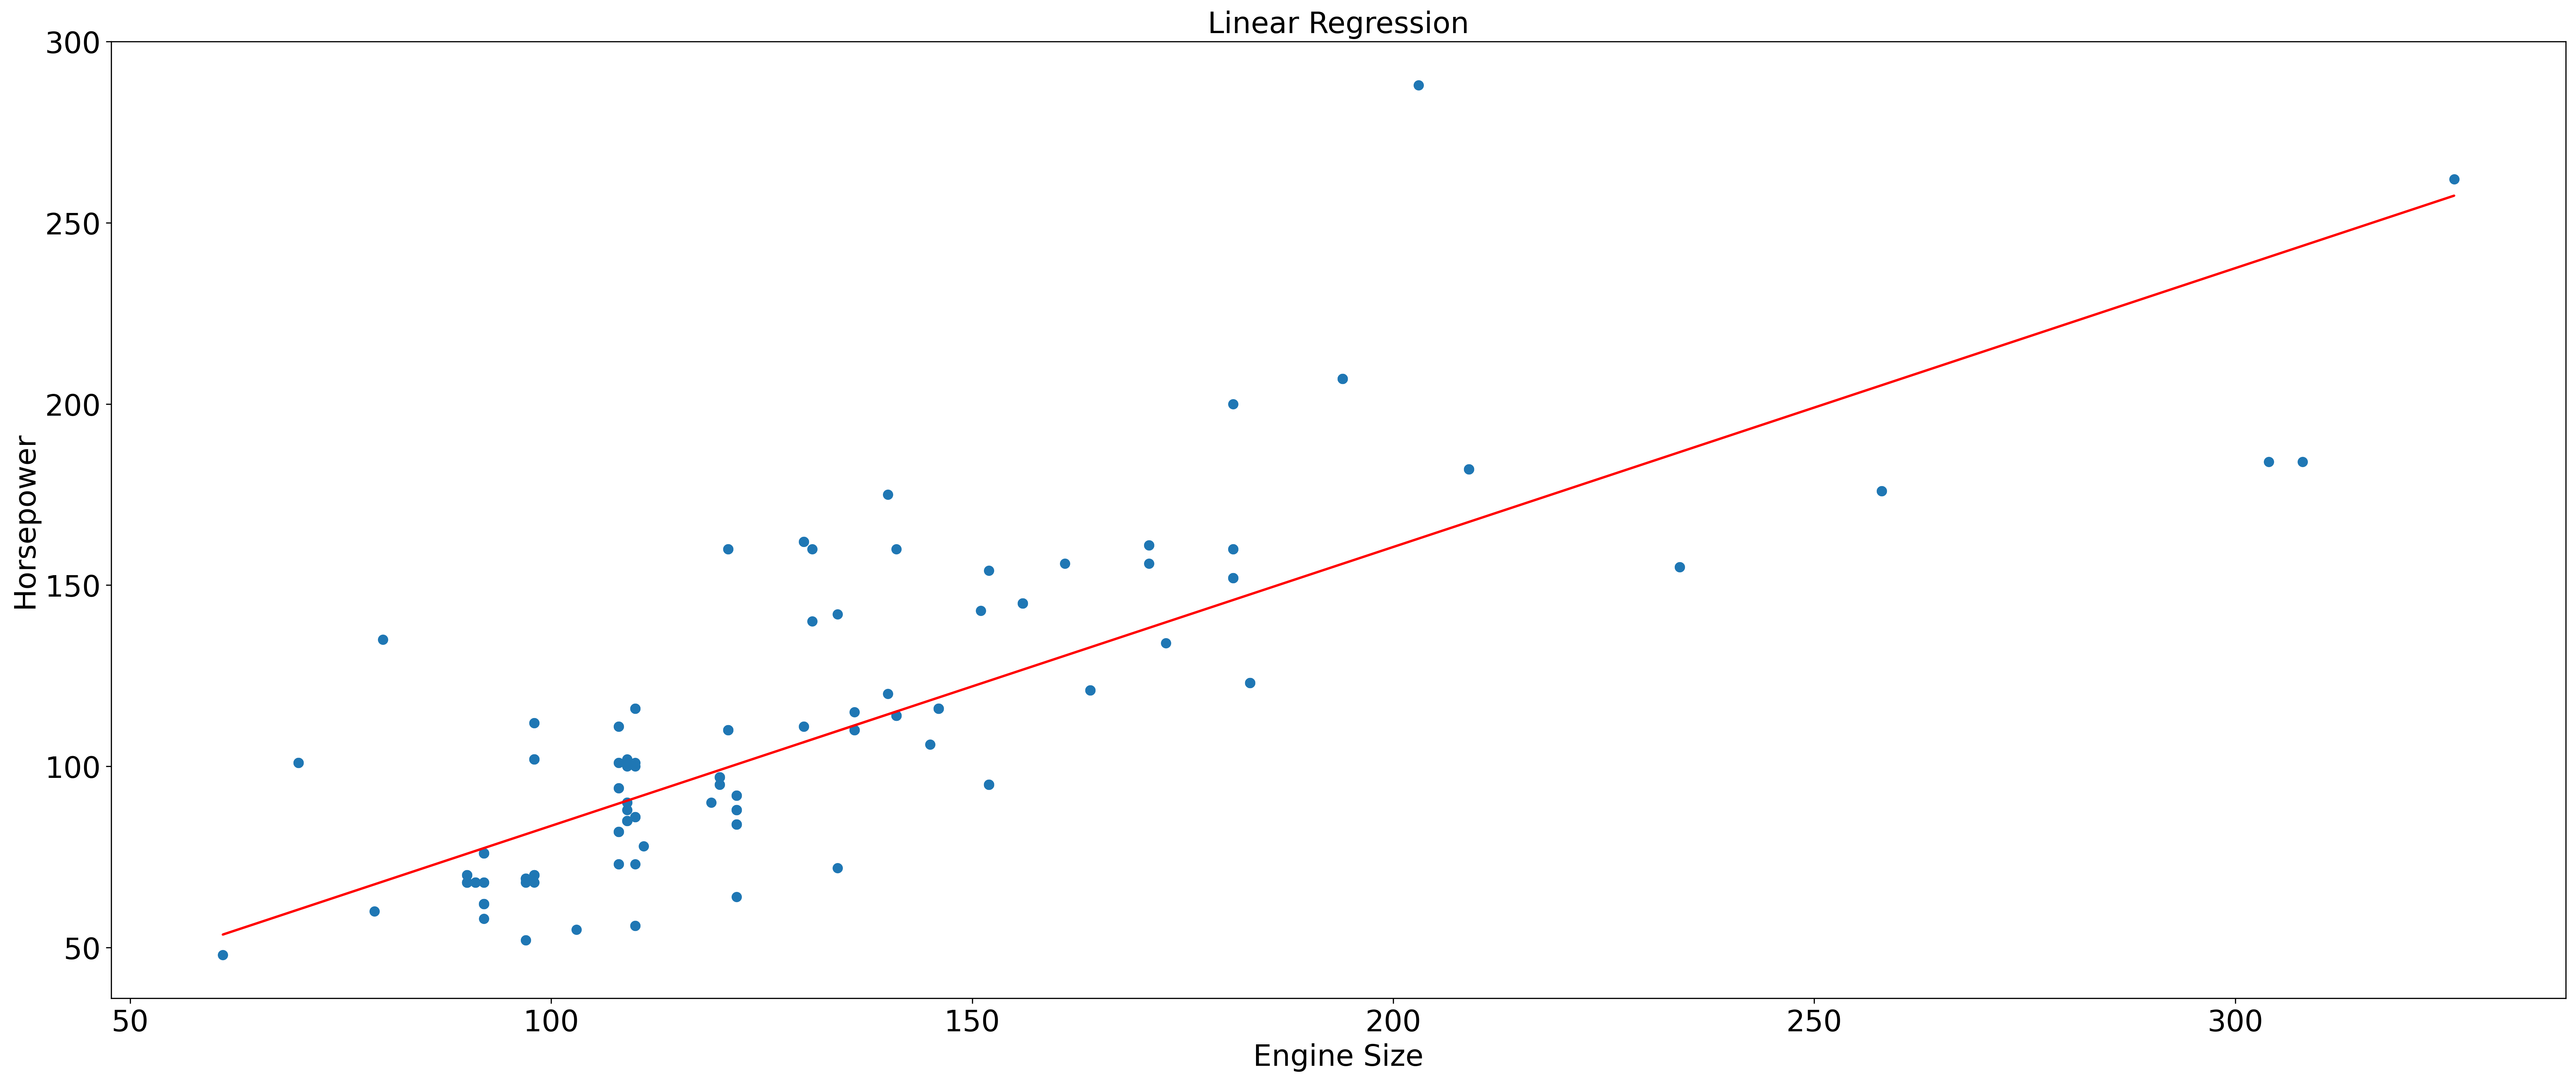

In [26]:
linearRegression(x,y,n,x_mean,y_mean)

Gradient Descent
a = 0.7835544500824068
b = 3.30806342691554
r^2 = 0.6556043573147754


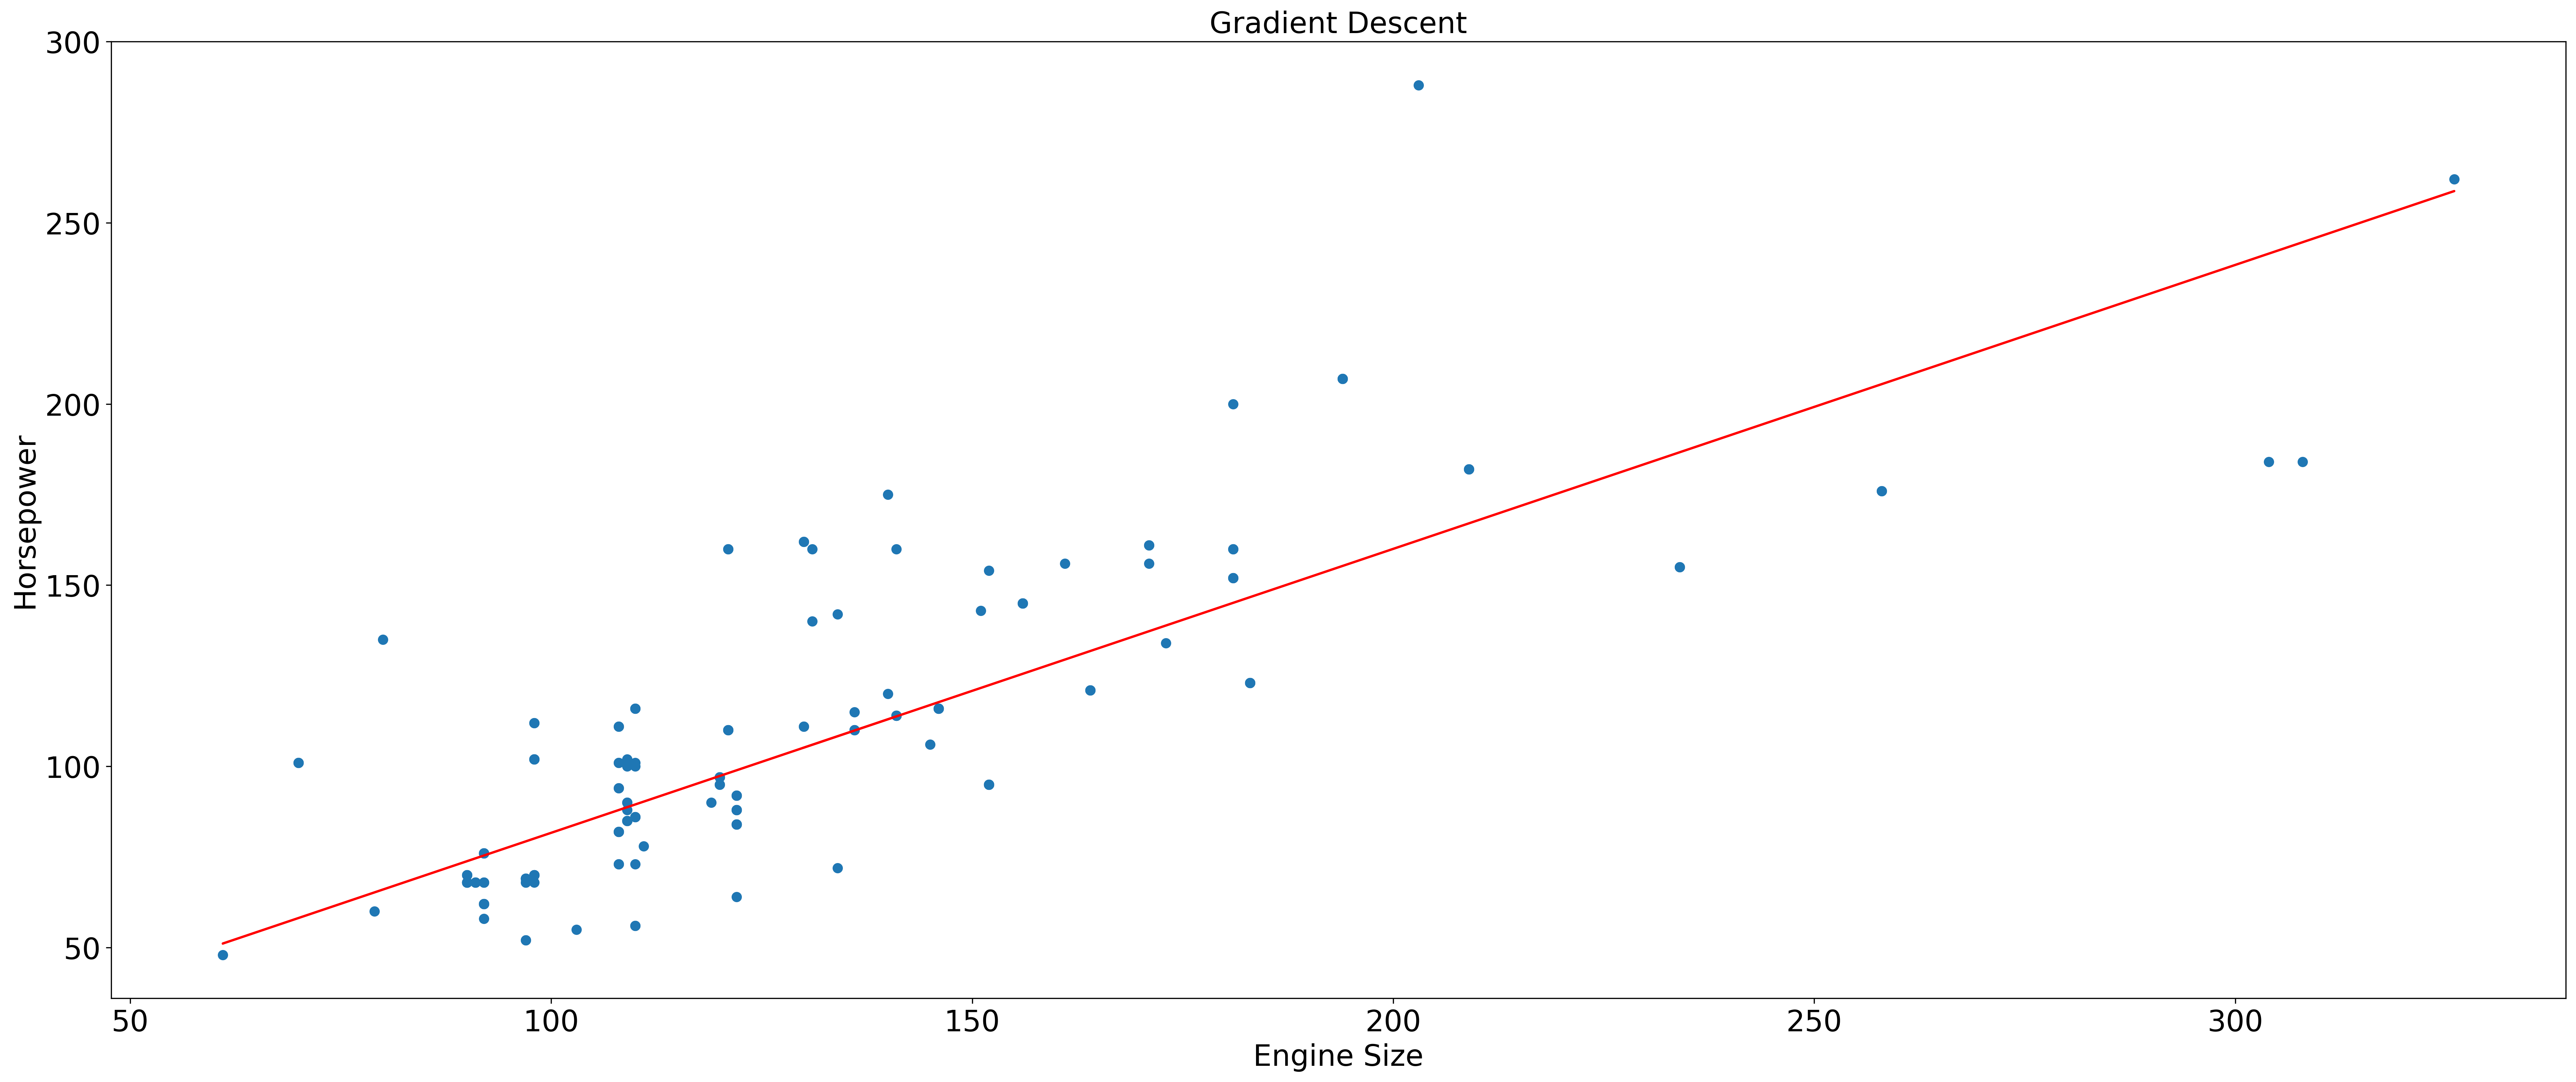

In [27]:
gradientDescent(x,y,n,y_mean)

In [28]:
print(n)

203
